In [6]:
# Import Dependencies
import os
import pandas as pd
import requests
import json
import pprint
from config import (aqs_api_key)
from config import (email_address)
import matplotlib.pyplot as plt
import numpy as np

# https://aqs.epa.gov/aqsweb/documents/data_api.html#signup for api information
pp = pprint.PrettyPrinter(indent = 4)
states_url = "https://aqs.epa.gov/data/api/list/states"
parameters_url = "https://aqs.epa.gov/data/api/list/classes"
sample_data_url = "https://aqs.epa.gov/data/api/dailyData/byState"
p1 = {"email" : email_address, "key" : aqs_api_key}

# States to be used and their ID Codes, All in top 10 for worst congestion and traffic
California = "06"
Hawaii = "15"
District_of_Columbia = "11"
New_York = "36"
Massachusetts = "25"

cali_data = []
hawaii_data = []
ny_data = []
dc_data = []
mass_data = []

In [7]:
# Create a DataFrame for New York and pull carbon monoxide data from API
ny_params = {"email" : email_address, "key" : aqs_api_key, "param" : "88502", 
          "bdate" : "20190101", "edate" : "20191231", "state" : New_York}

# Call to url
ny_response = requests.get(sample_data_url, params = ny_params).json()
ny_data.append(ny_response)

ny_df = pd.DataFrame(ny_data[0]["Data"])
ny_df.head()
#ny_df.to_csv('NY_data.csv')

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,36,005,0080,88502,3,40.83606,-73.92009,WGS84,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,...,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,MORRISANIA,"MORRISANIA CENTER, 1225-57 GERARD AVE.",New York,Bronx,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
1,36,005,0080,88502,3,40.83606,-73.92009,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,...,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,MORRISANIA,"MORRISANIA CENTER, 1225-57 GERARD AVE.",New York,Bronx,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
2,36,005,0080,88502,3,40.83606,-73.92009,WGS84,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,...,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,MORRISANIA,"MORRISANIA CENTER, 1225-57 GERARD AVE.",New York,Bronx,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
3,36,005,0080,88502,3,40.83606,-73.92009,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,...,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,MORRISANIA,"MORRISANIA CENTER, 1225-57 GERARD AVE.",New York,Bronx,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
4,36,005,0080,88502,3,40.83606,-73.92009,WGS84,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,...,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,MORRISANIA,"MORRISANIA CENTER, 1225-57 GERARD AVE.",New York,Bronx,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04


In [8]:
cleanNY_df = ny_df.drop(["parameter_code","datum","cbsa_code","poc","method_code","local_site_name","event_type","validity_indicator","method_code"], axis=1)
cleanNY_df.head()

,state_code,county_code,site_number,latitude,longitude,parameter,sample_duration,pollutant_standard,date_local,units_of_measure,...,first_max_value,first_max_hour,aqi,method,site_address,state,county,city,cbsa,date_of_last_change
0,36,005,0080,40.83606,-73.92009,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,None,2019-01-01,Micrograms/cubic meter (LC),...,12.8,17,NaN,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,"MORRISANIA CENTER, 1225-57 GERARD AVE.",New York,Bronx,New York,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
1,36,005,0080,40.83606,-73.92009,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,None,2019-01-01,Micrograms/cubic meter (LC),...,9.1,23,38.0,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,"MORRISANIA CENTER, 1225-57 GERARD AVE.",New York,Bronx,New York,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
2,36,005,0080,40.83606,-73.92009,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,None,2019-01-02,Micrograms/cubic meter (LC),...,12.5,6,NaN,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,"MORRISANIA CENTER, 1225-57 GERARD AVE.",New York,Bronx,New York,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
3,36,005,0080,40.83606,-73.92009,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,None,2019-01-02,Micrograms/cubic meter (LC),...,9.5,23,40.0,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,"MORRISANIA CENTER, 1225-57 GERARD AVE.",New York,Bronx,New York,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
4,36,005,0080,40.83606,-73.92009,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,None,2019-01-03,Micrograms/cubic meter (LC),...,15.1,6,NaN,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,"MORRISANIA CENTER, 1225-57 GERARD AVE.",New York,Bronx,New York,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04


In [9]:
countyaqiNY = cleanNY_df.groupby(["county"])["aqi"].mean().reset_index()
countyaqiNY

,county,aqi
0,Bronx,25.594483
1,Erie,27.643006
2,Essex,12.328402
3,Kings,24.401685
4,Monroe,27.631579
5,Nassau,23.200000
6,New York,28.598700
7,Oneida,19.109859
8,Orange,23.808333
9,Queens,27.086892


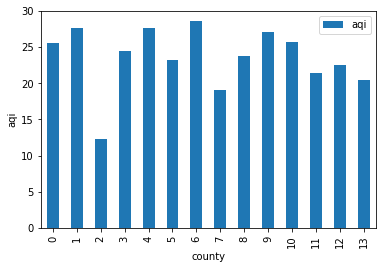

<Figure size 432x288 with 0 Axes>

In [10]:
aqi_chart = countyaqiNY.plot(kind='bar')
aqi_chart.set_xlabel("county")
aqi_chart.set_ylabel("aqi")


plt.show()
plt.tight_layout()

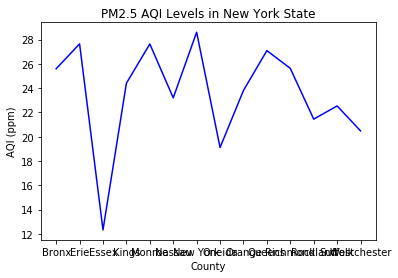

In [11]:
County = countyaqiNY["county"]
AQI = countyaqiNY["aqi"]
plt.title("PM2.5 AQI Levels in New York State")
plt.xlabel("County")
plt.ylabel('AQI (ppm)')
aqibydate, = plt.plot(County, AQI, color="blue", label="PM2.5 AQI Levels in New York State")
plt.show()

In [ ]:
countymaxvalueNY = cleanNY_df.groupby(["county"])["first_max_value"].mean().reset_index()
countymaxvalueNY

In [13]:
NYbydate_df = cleanNY_df.groupby(["date_local"])["aqi"].mean().reset_index()
NYbydate_df

,date_local,aqi
0,2019-01-01,38.285714
1,2019-01-02,35.045455
2,2019-01-03,37.521739
3,2019-01-04,46.086957
4,2019-01-05,41.260870
...,...,...
360,2019-12-27,41.869565
361,2019-12-28,49.818182
362,2019-12-29,43.869565
363,2019-12-30,16.500000


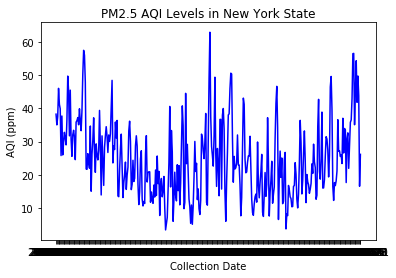

In [14]:
Time = NYbydate_df["date_local"]
AQI = NYbydate_df["aqi"]
plt.title("PM2.5 AQI Levels in New York State")
plt.xlabel("Collection Date")
plt.ylabel('AQI (ppm)')
aqibydate, = plt.plot(Time, AQI, color="blue", label="Ozone AQI Levels in New York State")
plt.show()